In [1]:
# Importar las librerias necesarias para hacer un EDA   
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Leer los datos
df_imss = pd.read_csv('../tidy/tidy_imss.csv')
df_agp = pd.read_csv('../tidy/tidy_agricultura_ganaderia_pesca.csv')

Para abordar la relación entre variables, se retomará el foco principal del proyecto. ¿Existe una relación entre el aumento de la producción y el aumento en los puestos de trabajos? Para seguir esto, apartir de los dataframes se generaran tablas de las cuales se tienen acumulados por años por sector.

El acumulado se hace por año porque es el maximo nivel de detalle temporal que se tiene sobre la producción del sector primario.

In [3]:
#Los datos de producción estan dados por año, por lo que voy a homologar los datos del imss para tener la cantidad de regristos anuales.
df_imss["fecha"] = pd.to_datetime(df_imss["fecha"])
df_imss["ANO"] = df_imss["fecha"].dt.year
#Y le daré el mismo formato a la columna de año de la tabla de agp
df_agp["ANO"] = pd.to_datetime(df_agp["ANO"])
df_agp["ANO"] = df_agp["ANO"].dt.year

In [4]:
#Registros anuales por sector
df_imss = df_imss.rename(columns={'sector_economico_2':'SECTOR'})
imss_registros_anual = df_imss[['ANO', 'SECTOR']].groupby(['ANO','SECTOR'])['SECTOR'].count()
imss_registros_anual = imss_registros_anual.unstack('SECTOR')
imss_registros_anual['TOTAL'] = imss_registros_anual[['Agricultura', 'Ganadería', 'Pesca']].sum(axis=1)
imss_registros_anual

SECTOR,Agricultura,Ganadería,Pesca,TOTAL
ANO,,,,
2006,32217,22069,14042,68328
2007,33055,22360,14425,69840
2008,30152,20431,13876,64459
2009,33495,22662,15796,71953
2010,35097,22531,15482,73110
2011,36353,23250,15884,75487
2012,37485,23754,15650,76889
2013,38876,23889,14871,77636
2014,40310,24245,14955,79510


In [5]:
#Produccion anual por sector
produccion_total_anual = df_agp[['ANO','SECTOR','PRODTON']].groupby(['ANO','SECTOR'])['PRODTON'].sum()
produccion_total_anual = produccion_total_anual.unstack('SECTOR').drop(index = 2023)
produccion_total_anual['TOTAL'] = produccion_total_anual[['Agricultura', 'Ganadería', 'Pesca']].sum(axis=1)
produccion_total_anual

SECTOR,Agricultura,Ganadería,Pesca,TOTAL
ANO,,,,
2006,4685124.21,555973.539,481505.00000,5.722603e+06
2007,4842636.26,551983.755,490754.00000,5.885374e+06
2008,5196275.24,555346.788,654957.00000,6.406579e+06
2009,4963296.84,562665.476,714565.00200,6.240527e+06
2010,5489600.86,556202.169,497641.00000,6.543444e+06
2011,5051580.94,567504.897,538763.00000,6.157849e+06
2012,5691756.43,569220.769,538644.00000,6.799621e+06
2013,5562560.85,588550.325,591013.00000,6.742124e+06
2014,5440900.21,561686.577,457990.00000,6.460577e+06


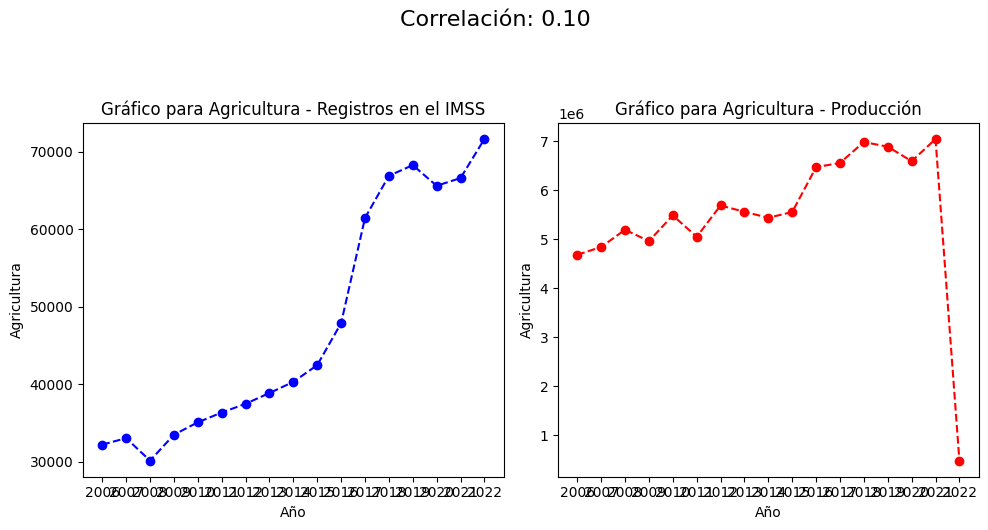

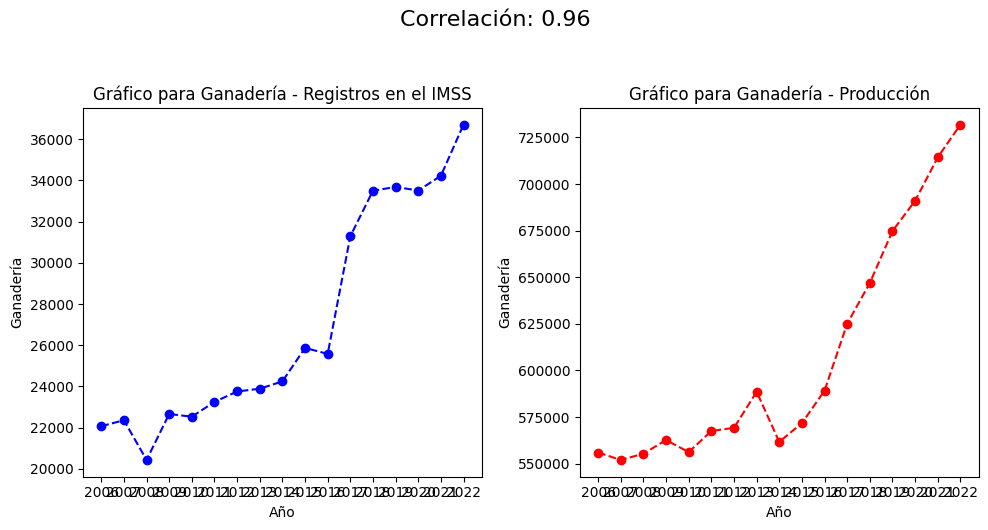

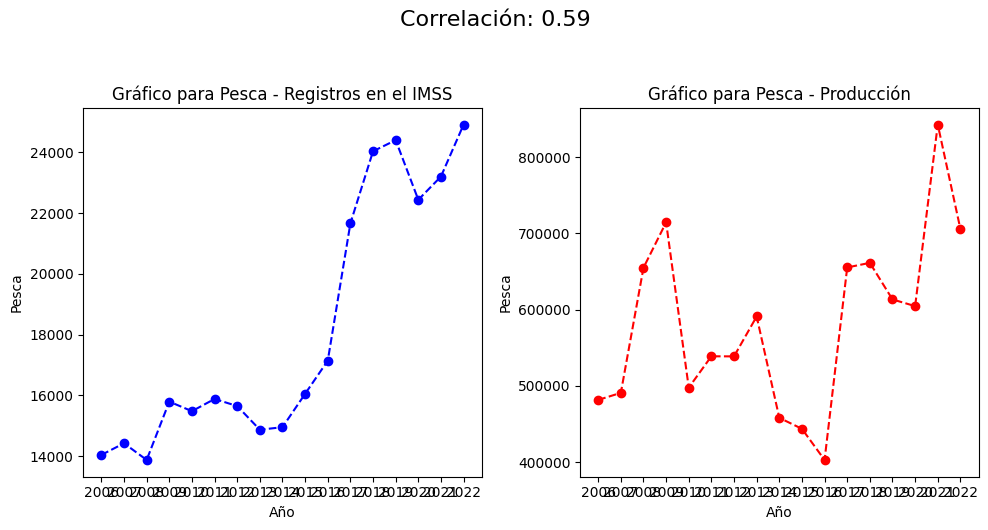

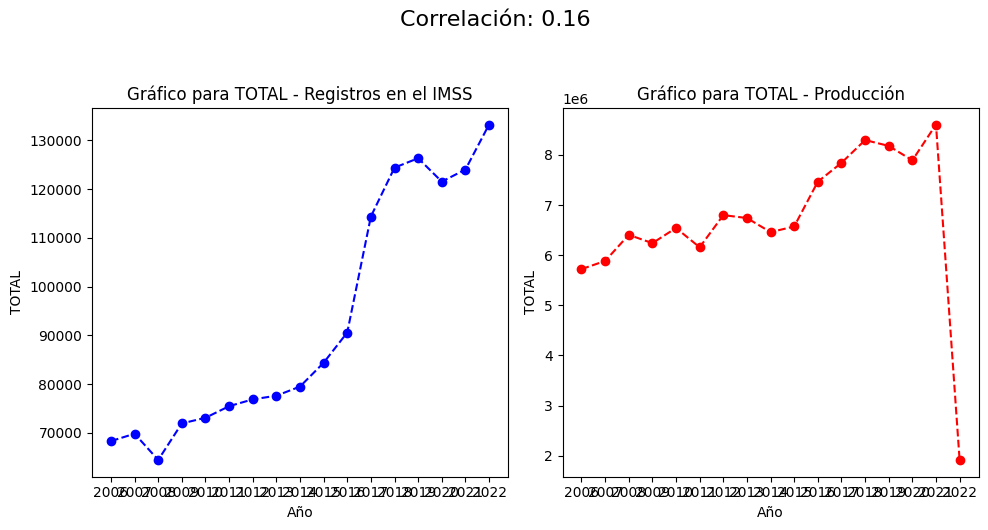

In [6]:
# Se realizan graficas por pares, para comparar el comportamiento de los registros y la produccion anual en cada sector
columns = produccion_total_anual.columns

for column in columns:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(imss_registros_anual.index, imss_registros_anual[column], marker='o', linestyle='--', color='b')
    plt.title(f'Gráfico para {column} - Registros en el IMSS')
    plt.xlabel('Año')
    plt.xticks(imss_registros_anual.index)
    plt.ylabel(column)

    plt.subplot(1, 2, 2)
    plt.plot(produccion_total_anual.index, produccion_total_anual[column], marker='o', linestyle='--', color='r')
    plt.title(f'Gráfico para {column} - Producción')
    plt.xlabel('Año')
    plt.xticks(produccion_total_anual.index)
    plt.ylabel(column)

    correlation = np.corrcoef(imss_registros_anual[column], produccion_total_anual[column])[0, 1]
    plt.suptitle(f'Correlación: {correlation:.2f}', y=1.05, fontsize=16)
    

    plt.tight_layout()
    plt.show()

De momento el unico sector prometedor podría ser el sector ganadero.

Se puede cambiar el angulo buscando si la producción total anual por municipio tiene correlación con los registros del IMSS anuales. 

In [7]:
produccion_municipio_anual = df_agp[['ANO','CVE_MUN','PRODTON']].groupby(['ANO','CVE_MUN'])['PRODTON'].sum().sort_index(level=0)
produccion_municipio_anual = produccion_municipio_anual.unstack().drop(index = 2023)
produccion_municipio_anual

CVE_MUN,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
ANO,,,,,,,,,,,,,,,,,,,,,
2006,16069.400,14768.000,7879.308,41718.500,1736.000,35561.450,1898.600,6712.000,3967.900,17985.000,...,3839.000,36751.300,14215.700,104217.800,20215.500,15505.400,2485.700,32296.300,210044.160,143394.240
2007,20202.000,13704.000,17339.289,61535.400,3483.500,16852.100,21323.440,10939.000,2285.500,3928.000,...,6510.000,46279.200,16630.220,128377.900,18699.800,12649.000,2677.000,33860.850,215019.830,210426.940
2008,18004.940,15450.600,10797.575,58813.600,6401.000,36015.160,4967.490,15220.000,5159.500,10944.100,...,2019.000,49691.200,22459.400,122380.480,19523.500,15925.000,5124.600,34520.160,192139.820,234834.650
2009,19167.830,12956.900,19381.500,47389.780,5056.500,29861.300,5484.000,10253.000,4075.900,12115.250,...,12470.000,30494.300,32993.400,111358.060,14828.200,5636.476,3093.000,53309.240,201551.380,140607.000
2010,17405.240,9502.400,12350.175,50414.800,8043.470,33963.390,5740.700,5326.540,6806.490,9886.150,...,5183.760,37246.230,28510.200,122439.673,12071.530,12994.185,3736.160,32702.500,212709.270,157315.000
2011,21171.320,27542.950,16648.120,26332.430,10957.900,31280.525,6047.650,2567.500,5937.500,4763.300,...,3452.100,31558.400,29194.000,113175.450,10512.990,13249.900,6882.120,39034.040,233733.000,161901.520
2012,27640.549,35110.000,18559.160,71713.760,9564.900,33766.457,3504.900,2787.000,5036.300,4965.150,...,3606.800,25820.090,34559.850,119655.705,10841.260,13252.020,4744.700,27761.200,265678.240,209819.230
2013,26384.662,30954.000,16896.921,76783.700,6005.180,33578.530,7181.390,3160.350,4453.280,5954.700,...,2158.800,23152.200,44380.780,109280.447,11968.530,12800.260,2810.610,37861.900,286588.620,235094.180
2014,24325.350,22526.900,19417.310,93060.040,5529.830,31909.200,4607.210,5331.000,3641.360,5619.540,...,2629.400,21976.710,36226.000,84733.980,11278.900,12454.250,2586.980,30786.750,288868.640,265899.480


In [8]:
claves_df = pd.read_csv('../util/cvemun.csv', names=['cve_mun', 'municipio'])

df_imss['municipio'] = df_imss['municipio'].str.upper()
claves_df['municipio'] = claves_df['municipio'].str.upper()

df_imss_claves = pd.merge(df_imss, claves_df, on='municipio', how='left')

In [9]:
imss_municipio_anual = df_imss_claves[['ANO','cve_mun']].groupby(['ANO','cve_mun'])['cve_mun'].count()
imss_municipio_anual = imss_municipio_anual.unstack().fillna(0)
imss_municipio_anual

cve_mun,1,2,3,4,5,6,8,10,11,12,...,62,63,64,65,66,67,69,70,71,72
ANO,,,,,,,,,,,,,,,,,,,,,
2006,48.0,1110.0,254.0,935.0,0.0,0.0,0.0,0.0,0.0,57.0,...,0.0,0.0,0.0,0.0,469.0,0.0,0.0,116.0,592.0,233.0
2007,32.0,1095.0,215.0,916.0,0.0,0.0,0.0,0.0,0.0,131.0,...,0.0,0.0,0.0,0.0,449.0,0.0,0.0,132.0,571.0,158.0
2008,0.0,943.0,224.0,748.0,0.0,0.0,0.0,0.0,0.0,176.0,...,0.0,0.0,0.0,0.0,416.0,0.0,0.0,151.0,545.0,145.0
2009,0.0,1448.0,218.0,899.0,0.0,0.0,0.0,0.0,0.0,305.0,...,4.0,0.0,0.0,0.0,399.0,0.0,0.0,117.0,660.0,183.0
2010,0.0,1745.0,266.0,894.0,0.0,2.0,0.0,0.0,0.0,384.0,...,1.0,0.0,0.0,0.0,417.0,0.0,0.0,126.0,711.0,203.0
2011,0.0,1885.0,284.0,934.0,0.0,12.0,0.0,0.0,0.0,385.0,...,3.0,0.0,0.0,0.0,423.0,0.0,0.0,130.0,737.0,197.0
2012,0.0,1838.0,231.0,882.0,0.0,12.0,0.0,0.0,0.0,512.0,...,1.0,0.0,0.0,0.0,424.0,0.0,0.0,143.0,926.0,278.0
2013,0.0,1862.0,181.0,845.0,0.0,15.0,0.0,0.0,0.0,633.0,...,33.0,0.0,0.0,0.0,479.0,0.0,0.0,136.0,936.0,499.0
2014,40.0,1238.0,261.0,909.0,2.0,24.0,10.0,0.0,0.0,705.0,...,36.0,0.0,0.0,0.0,465.0,14.0,0.0,129.0,982.0,587.0


In [10]:
mun_corr = []

for cve in claves_df['cve_mun']:
    try:
        correlation = np.corrcoef(imss_municipio_anual[cve], produccion_municipio_anual[cve])[0, 1]
        mun_corr.append({
            'cve_mun': cve,
            'correlation': correlation
        })
    except KeyError:
        pass

mun_corr = pd.DataFrame(mun_corr)

mun_corr_top = mun_corr.loc[mun_corr['correlation'] > 0.75]
mun_corr_top=pd.merge(mun_corr_top, claves_df, on = 'cve_mun')[['municipio', 'cve_mun', 'correlation']]
mun_corr_top

,municipio,cve_mun,correlation
0,CABORCA,17,0.82048


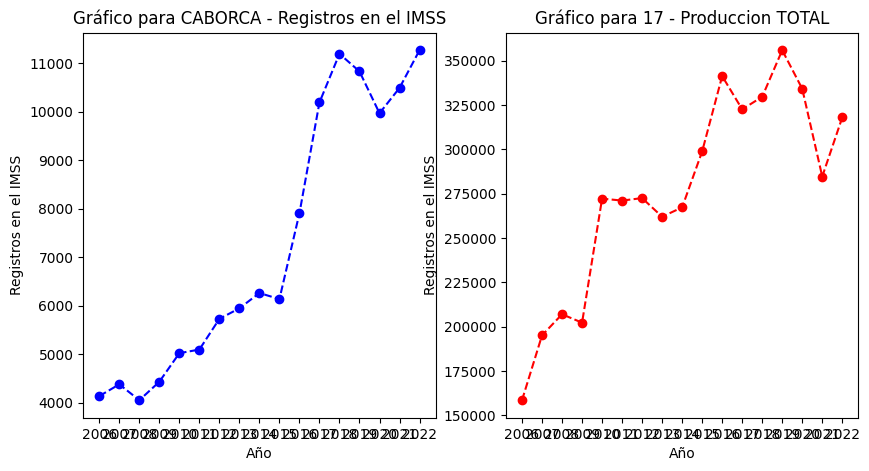

In [11]:
#Registros anuales por sector por municipio
df_imss_top_corr = df_imss[df_imss['municipio'].isin(mun_corr_top['municipio'])]
imss_registros_anual_top_corr = df_imss_top_corr[['ANO', 'SECTOR', 'municipio']].groupby(['ANO','SECTOR', 'municipio'])['SECTOR'].count()
imss_registros_anual_top_corr = imss_registros_anual_top_corr.unstack('SECTOR')
imss_registros_anual_top_corr['TOTAL'] = imss_registros_anual_top_corr[['Agricultura', 'Ganadería', 'Pesca']].sum(axis=1)
imss_registros_anual_top_corr

#Produccion anual por sector por municipio
df_agp_top_corr = df_agp[df_agp['CVE_MUN'].isin(mun_corr_top['cve_mun'])]
prod_mun_top_corr = df_agp_top_corr[['ANO','SECTOR','PRODTON','CVE_MUN']].groupby(['ANO','SECTOR','CVE_MUN'])['PRODTON'].sum()
prod_mun_top_corr = prod_mun_top_corr.unstack('SECTOR')
prod_mun_top_corr['TOTAL'] = prod_mun_top_corr[['Agricultura', 'Ganadería', 'Pesca']].sum(axis=1)
prod_mun_top_corr

# Graficar el total de cada municipio a lo largo de los años
municipios = imss_registros_anual_top_corr.index.get_level_values('municipio').unique()
claves = prod_mun_top_corr.index.get_level_values('CVE_MUN').unique()
years = imss_registros_anual_top_corr.index.get_level_values('ANO').unique()

for municipio in zip(municipios, claves):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    registros_municipio = imss_registros_anual_top_corr.loc[imss_registros_anual_top_corr.index.get_level_values('municipio') == municipio[0]]
    plt.plot(years, registros_municipio['TOTAL'],marker='o', linestyle='--', color='b')
    plt.title(f'Gráfico para {municipio[0]} - Registros en el IMSS')
    plt.xlabel('Año')
    plt.xticks(imss_registros_anual.index)
    plt.ylabel('Registros en el IMSS')

    plt.subplot(1, 2, 2)
    produccion_municipio = prod_mun_top_corr.loc[prod_mun_top_corr.index.get_level_values('CVE_MUN') == municipio[1]]
    plt.plot(years, produccion_municipio['TOTAL'],marker='o', linestyle='--', color='r')
    plt.title(f'Gráfico para {municipio[1]} - Produccion TOTAL')
    plt.xlabel('Año')
    plt.xticks(imss_registros_anual.index)
    plt.ylabel('Registros en el IMSS')

    plt.show()


Se puede ver que para estos municipios el nivel de producción total coincide mucho en comportamiento a la grafica de registros ante el IMSS. La linea a seguir a partir de este resultado sería considerar si este resultado es significativo conocienco el contexto de estos municipios y que particularides pueden producir este comportamiento.